In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-top-50-bestselling-books-2009-2019/bestsellers with categories.csv


In [2]:
df=pd.read_csv('/kaggle/input/amazon-top-50-bestselling-books-2009-2019/bestsellers with categories.csv')
print(df.head())

                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  


In [3]:
print(df.shape)

(550, 7)


The dataframe has 7 columns and 550 rows.

In [4]:
df.isnull().values.any()

False

There are no NaN values in a Dataframe.


In [5]:
print(df['User Rating'].max())

4.9


The Maximum rating that a book has received is 4.9

In [6]:
df1=df[df['User Rating']==4.9]
print(df1)

                                                  Name                 Author  \
40            Brown Bear, Brown Bear, What Do You See?        Bill Martin Jr.   
41            Brown Bear, Brown Bear, What Do You See?        Bill Martin Jr.   
81   Dog Man and Cat Kid: From the Creator of Capta...             Dav Pilkey   
82   Dog Man: A Tale of Two Kitties: From the Creat...             Dav Pilkey   
83   Dog Man: Brawl of the Wild: From the Creator o...             Dav Pilkey   
84   Dog Man: Brawl of the Wild: From the Creator o...             Dav Pilkey   
85   Dog Man: Fetch-22: From the Creator of Captain...             Dav Pilkey   
86   Dog Man: For Whom the Ball Rolls: From the Cre...             Dav Pilkey   
87   Dog Man: Lord of the Fleas: From the Creator o...             Dav Pilkey   
146  Goodnight, Goodnight Construction Site (Hardco...   Sherri Duskey Rinker   
147  Goodnight, Goodnight Construction Site (Hardco...   Sherri Duskey Rinker   
151                         

Printing the details of the books with highest ratings

In [7]:
df2=df1.groupby(['Author']).size().reset_index(name="Count")
print(df2)

                   Author  Count
0          Alice Schertle      1
1         Bill Martin Jr.      2
2         Brandon Stanton      1
3             Chip Gaines      1
4              Dav Pilkey      7
5               Dr. Seuss      8
6   Emily Winfield Martin      4
7              Eric Carle      7
8           J. K. Rowling      1
9            J.K. Rowling      3
10            Jeff Kinney      1
11             Jill Twiss      1
12     Lin-Manuel Miranda      1
13          Mark R. Levin      1
14         Nathan W. Pyle      1
15         Patrick Thorpe      1
16             Pete Souza      1
17          Rush Limbaugh      2
18            Sarah Young      6
19   Sherri Duskey Rinker      2


Printing the list of authors and the best sellers that they have produced.


In [8]:
df2=df2.sort_values(by='Count',ascending=False)
print(df2)

                   Author  Count
5               Dr. Seuss      8
4              Dav Pilkey      7
7              Eric Carle      7
18            Sarah Young      6
6   Emily Winfield Martin      4
9            J.K. Rowling      3
19   Sherri Duskey Rinker      2
17          Rush Limbaugh      2
1         Bill Martin Jr.      2
13          Mark R. Levin      1
16             Pete Souza      1
15         Patrick Thorpe      1
14         Nathan W. Pyle      1
0          Alice Schertle      1
12     Lin-Manuel Miranda      1
11             Jill Twiss      1
8           J. K. Rowling      1
3             Chip Gaines      1
2         Brandon Stanton      1
10            Jeff Kinney      1


The higheset number of best sellers are produced by Dr. Seuss who has produced 8 best sellers who has received highest ratings from users, followed by Dav Pilkey and Eric Carle who have produced 7 best sellers each of higheset ratings.

In [9]:
df3=df1.groupby(['Genre']).size().reset_index(name="Count")
print(df3)

         Genre  Count
0      Fiction     41
1  Non Fiction     11


The books that have received maximum ratings from users, out of which 41 are Fiction and only 11 are non fiction.

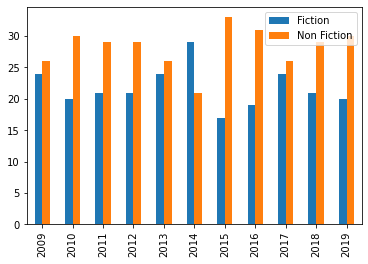

In [10]:
df4=df.groupby(['Year','Genre']).size().reset_index(name="Count")
dfFiction=df4[df4['Genre']=='Fiction']
dfNonFiction=df4[df4['Genre']=='Non Fiction']
fic=dfFiction['Count'].tolist()
nonfic=dfNonFiction['Count'].tolist()
year=dfFiction['Year'].tolist()
dfGr=pd.DataFrame({'Fiction': fic,
                   'Non Fiction': nonfic}, index=year)
ax = dfGr.plot.bar()

The bar chart above shows the number of books that were fiction vs non fiction among the best sellers over the years. For all the years except 2014, the number of fiction best sellers have been greater than non fiction best sellers.



In [11]:
MaxPrice=df['Price'].max()
MinPrice=df['Price'].min()
print(MaxPrice)
print(MinPrice)

105
0


The Maximum price of a book is 105 and min is 0.

In [12]:
dfx=df[df['Price']==0]
print(dfx.size)

84


There are 84 books for which price is 0. It may be because of those books being available in electronic format i.e. s ebooks.


In [13]:
print(df['Price'].mean())

13.1


The average price of book is 13.1


In [14]:
print(df['User Rating'].mean())

4.618363636363641


The average rating received on a best selling book is 4.6


In [15]:
minRev=df['Reviews'].min()
minRevDf=df[df['Reviews']==minRev]
print(minRevDf)


                                                 Name        Author  \
78  Divine Soul Mind Body Healing and Transmission...  Zhi Gang Sha   

    User Rating  Reviews  Price  Year        Genre  
78          4.6       37      6  2009  Non Fiction  


The book 'Divine Soul Mind Body Healing and Transmission' has got minimum reviews (37) among the best sellers.

In [16]:
maxRev=df['Reviews'].max()
maxRevDf=df[df['Reviews']==maxRev]
print(maxRevDf)

                        Name       Author  User Rating  Reviews  Price  Year  \
534  Where the Crawdads Sing  Delia Owens          4.8    87841     15  2019   

       Genre  
534  Fiction  


The book 'Where the Crawdads sing' has got maximum user reviews (87841) among the best sellers.

In [17]:
df5=df.groupby('Author')['User Rating'].mean()
print(df5)

Author
Abraham Verghese              4.600000
Adam Gasiewski                4.400000
Adam Mansbach                 4.800000
Adir Levy                     4.800000
Admiral William H. McRaven    4.700000
                                ...   
Walter Isaacson               4.566667
William Davis                 4.400000
William P. Young              4.600000
Wizards RPG Team              4.800000
Zhi Gang Sha                  4.600000
Name: User Rating, Length: 248, dtype: float64


The above data shows average rating of every best selling author